In [1]:
import fiona
import geopandas as gpd
import pandas as pd
import shapely
from shapely import geometry
import json
import googlemaps
import time
from IPython.core.display import display, HTML
from IPython.display import IFrame
import re
from functools import partial
import ast 
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
places_df = pd.read_csv('../data/places_GP.csv')

Text(0, 0.5, 'Средний нормализованный рейтинг')

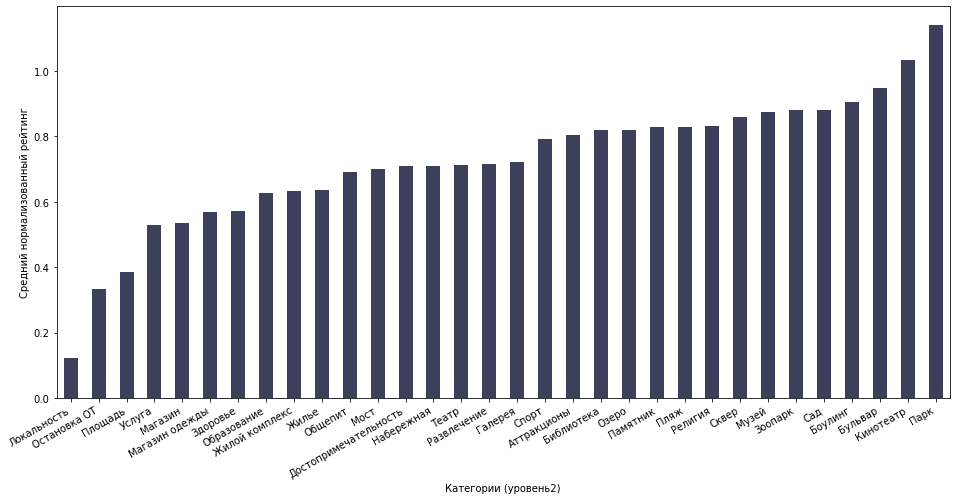

In [39]:
places_df.groupby('category_2').mean()['normalized_rating'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории (уровень2)')
plt.ylabel('Средний нормализованный рейтинг')

Text(0, 0.5, 'Средний нормализованный рейтинг')

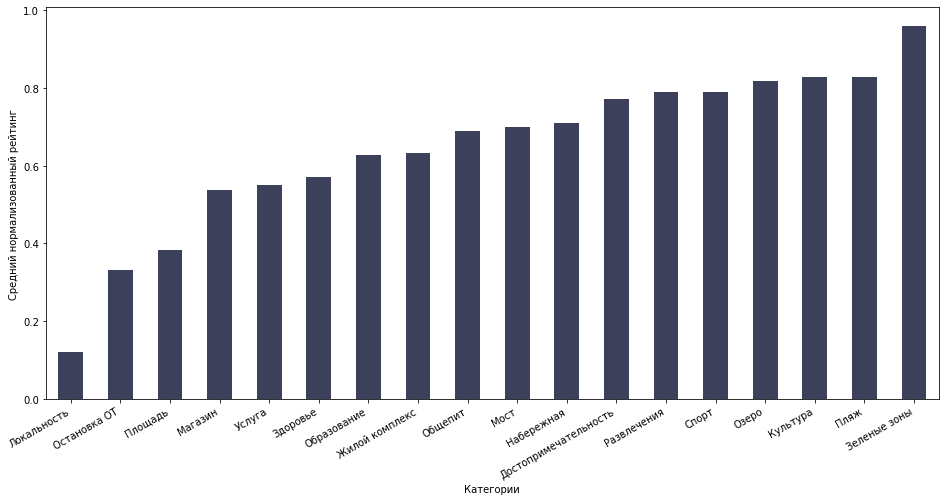

In [37]:
places_df.groupby('category').mean()['normalized_rating'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории')
plt.ylabel('Средний нормализованный рейтинг')

In [4]:
places_df.sort_values('normalized_rating', ascending = False)[:20].category.drop_duplicates()

1609     Зеленые зоны
1616            Спорт
15425         Магазин
2740      Развлечения
15233            Мост
Name: category, dtype: object

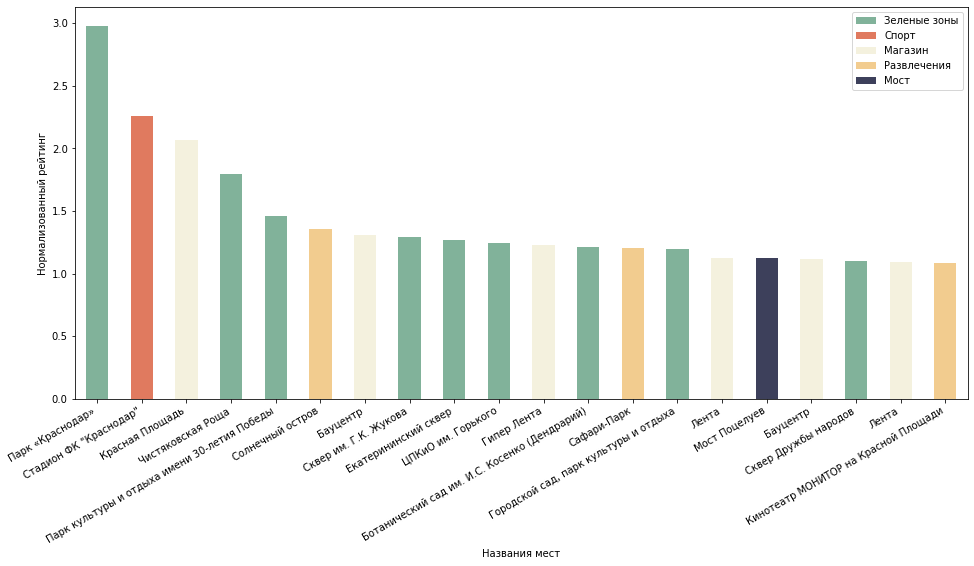

In [7]:
dict_colors = {'Зеленые зоны': "#81B29A", "Спорт": "#E07A5F", "Магазин": "#F4F1DE", "Развлечения":"#F2CC8F", 'Мост':'#3D405B'}
plot_df = places_df.sort_values('normalized_rating', ascending = False)[:20]

plot_df.set_index('title')['normalized_rating'].plot.bar( color = plot_df['category'].replace(dict_colors), figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Названия мест')
plt.ylabel('Нормализованный рейтинг')

legend_elements = [Patch(facecolor=dict_colors[c], label=c) for c in  dict_colors.keys()]
plt.legend(handles=legend_elements)

15425    Красная Площадь
8021            Бауцентр
13893        Гипер Лента
10674              Лента
11791           Бауцентр
11147              Лента
3609            Декатлон
5365              Табрис
6708              Табрис
72          Леруа Мерлен
Name: title, dtype: object

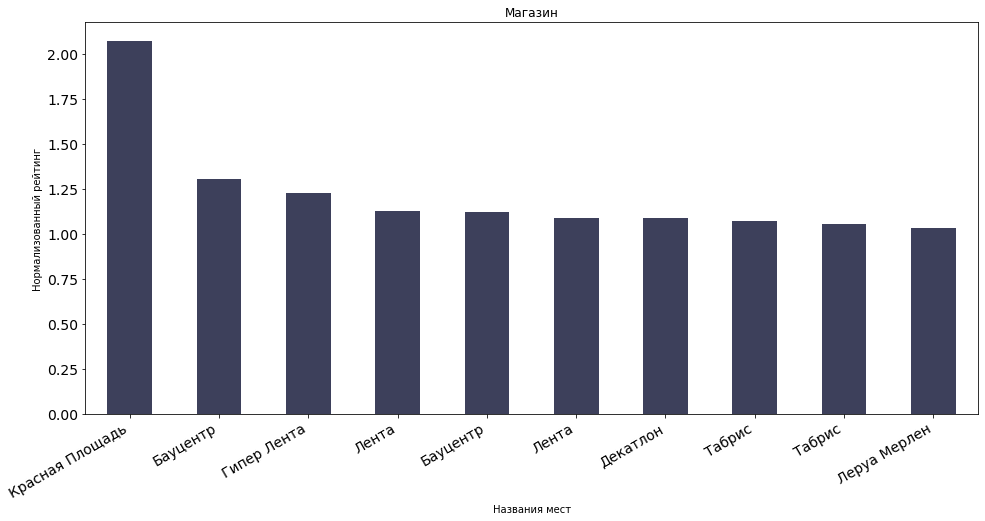

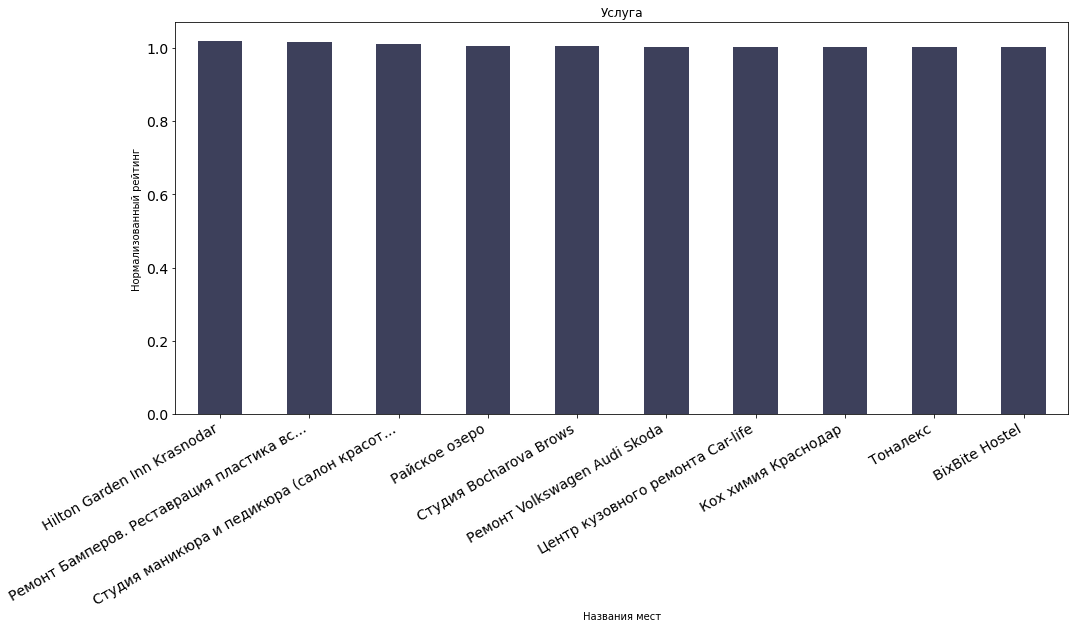

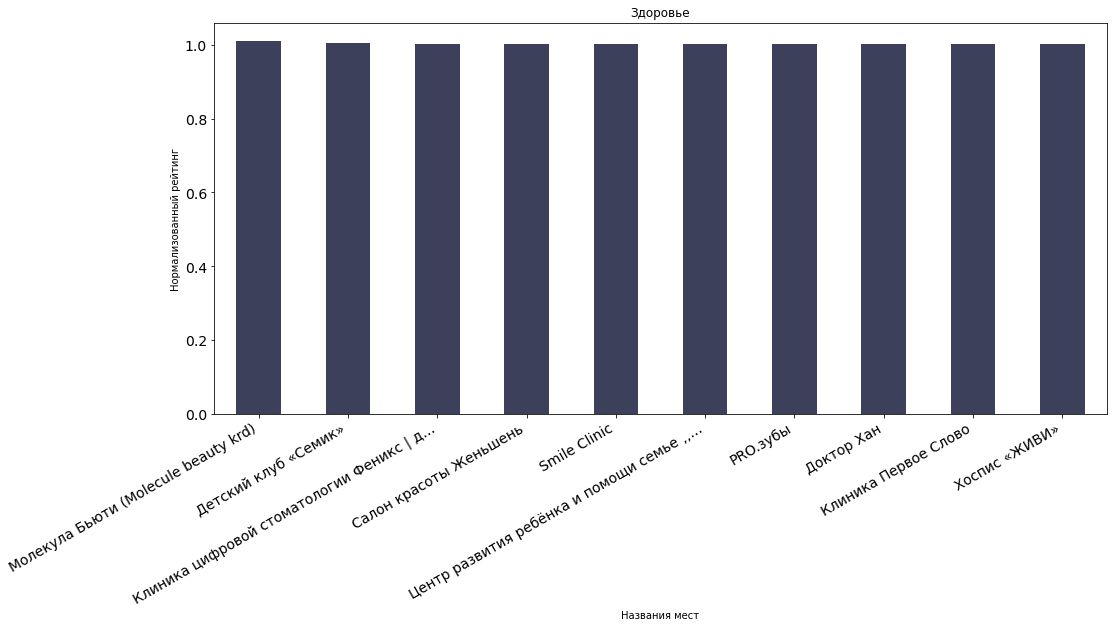

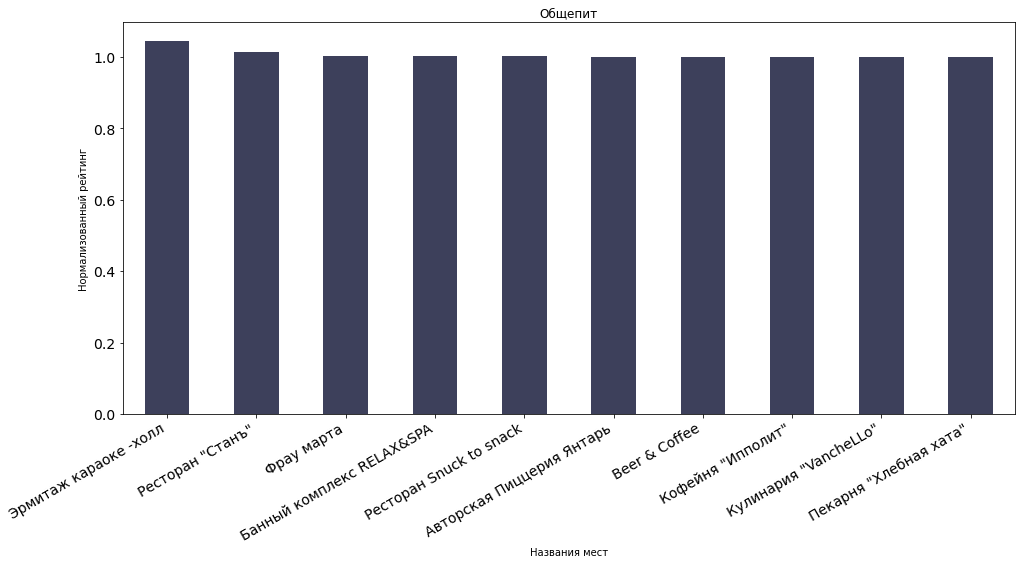

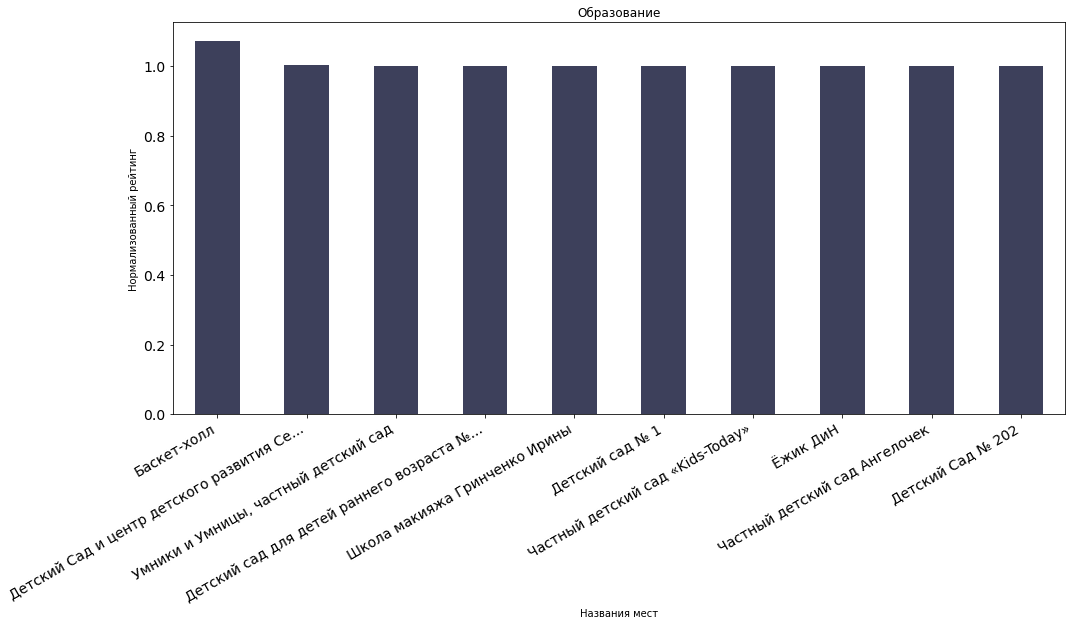

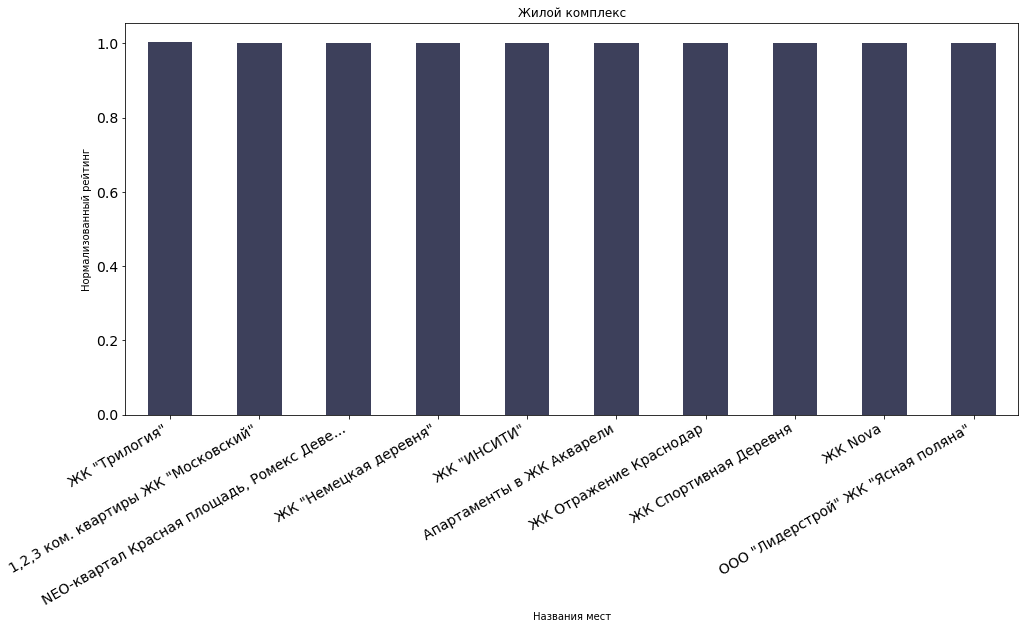

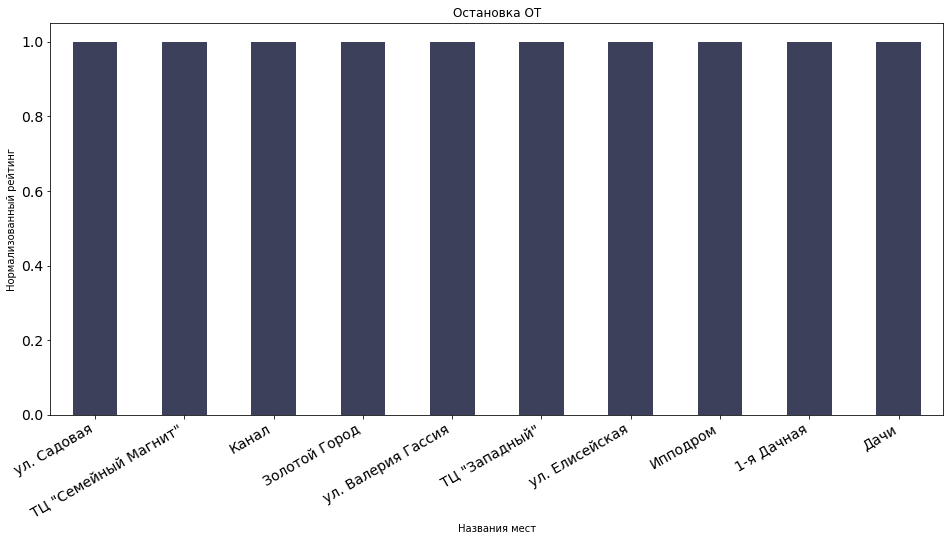

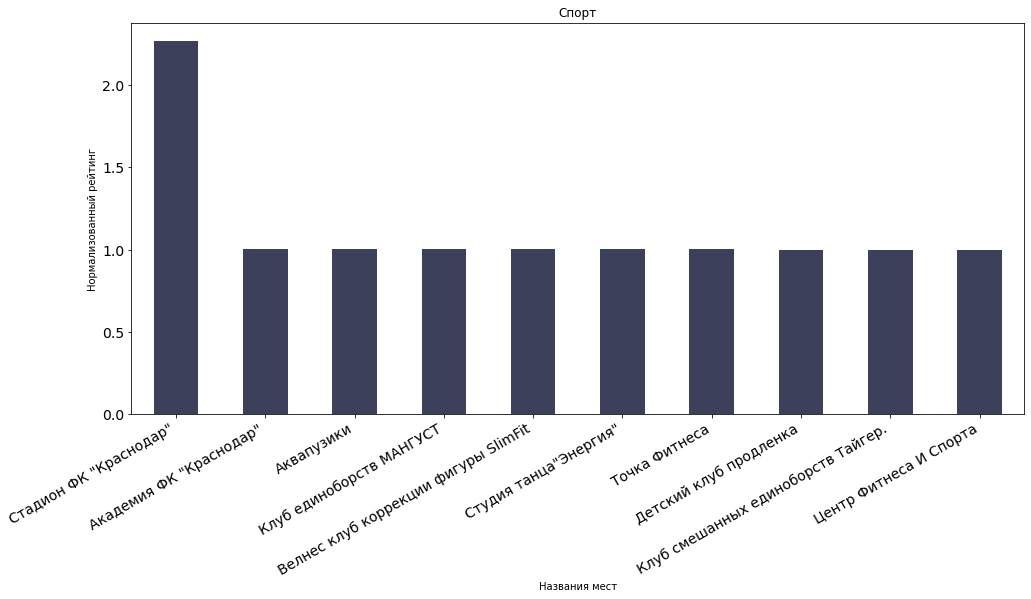

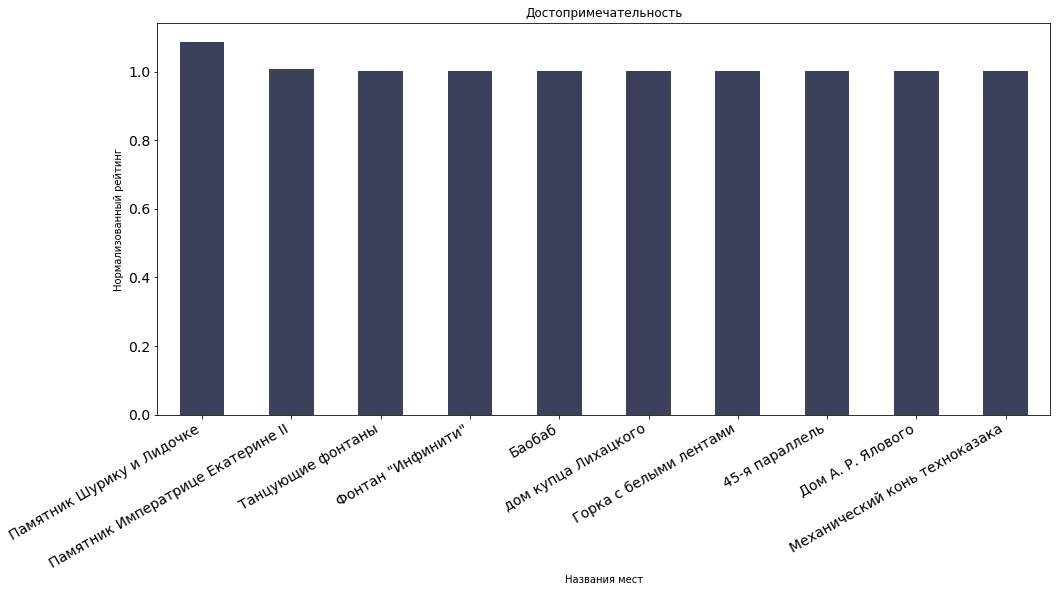

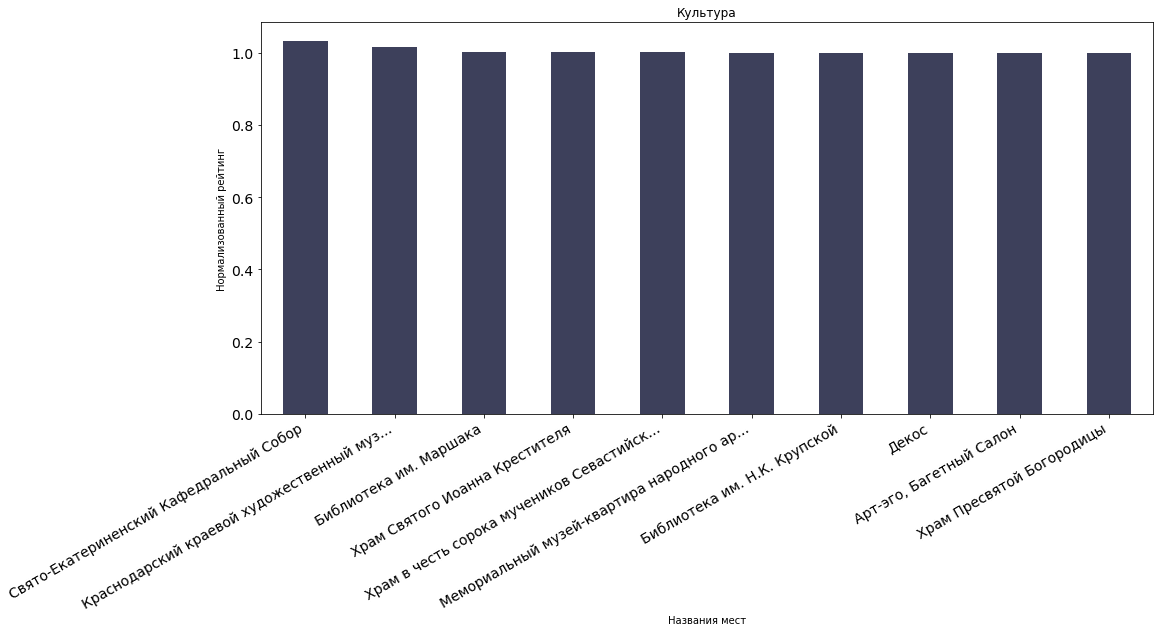

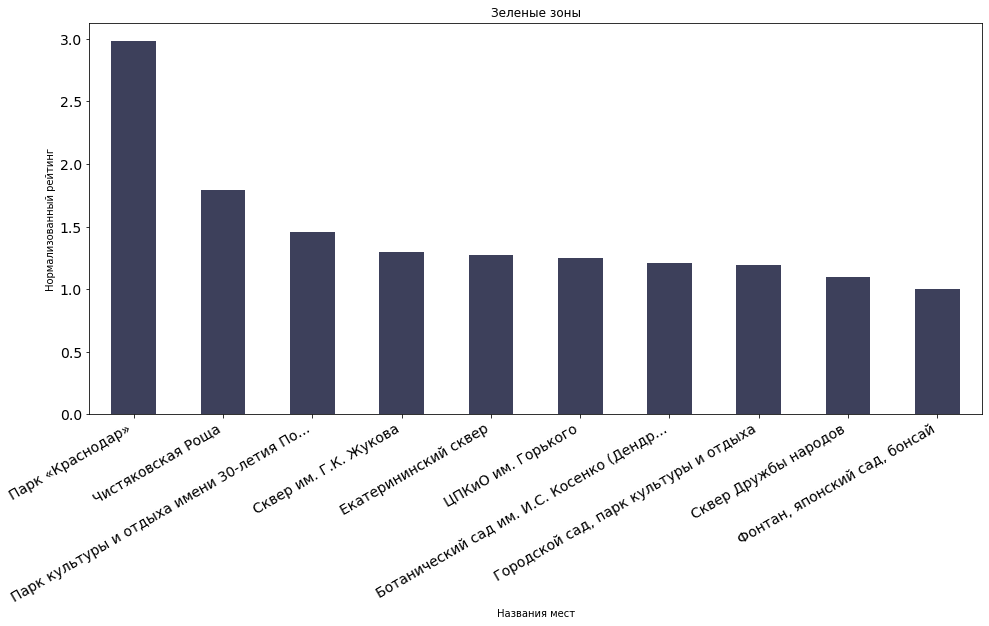

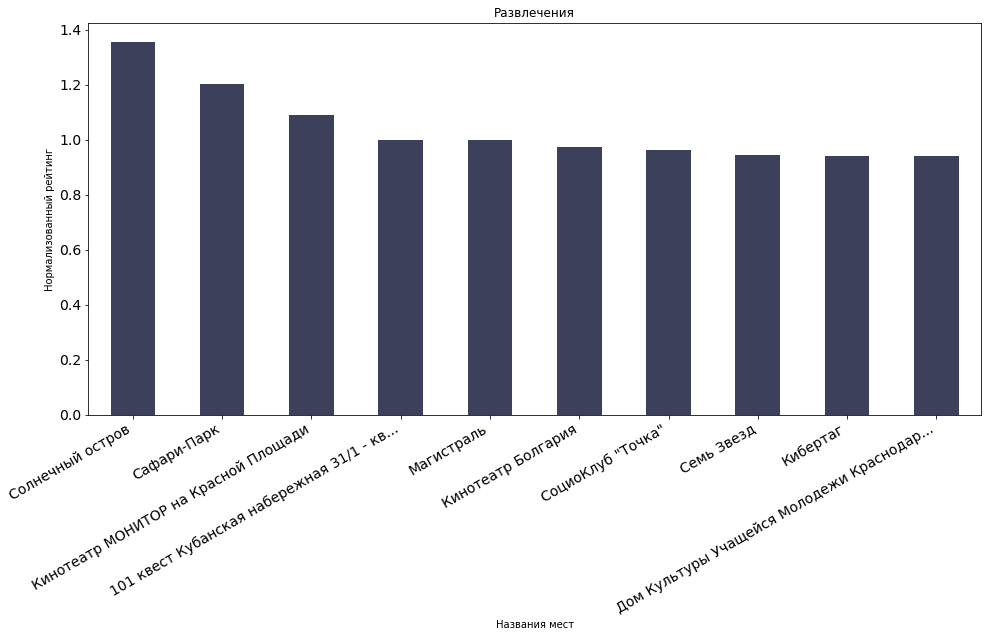

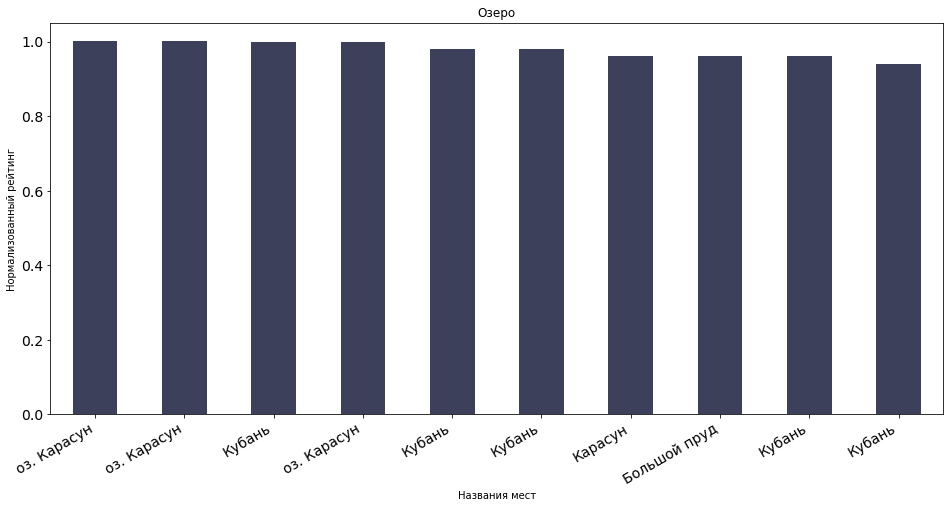

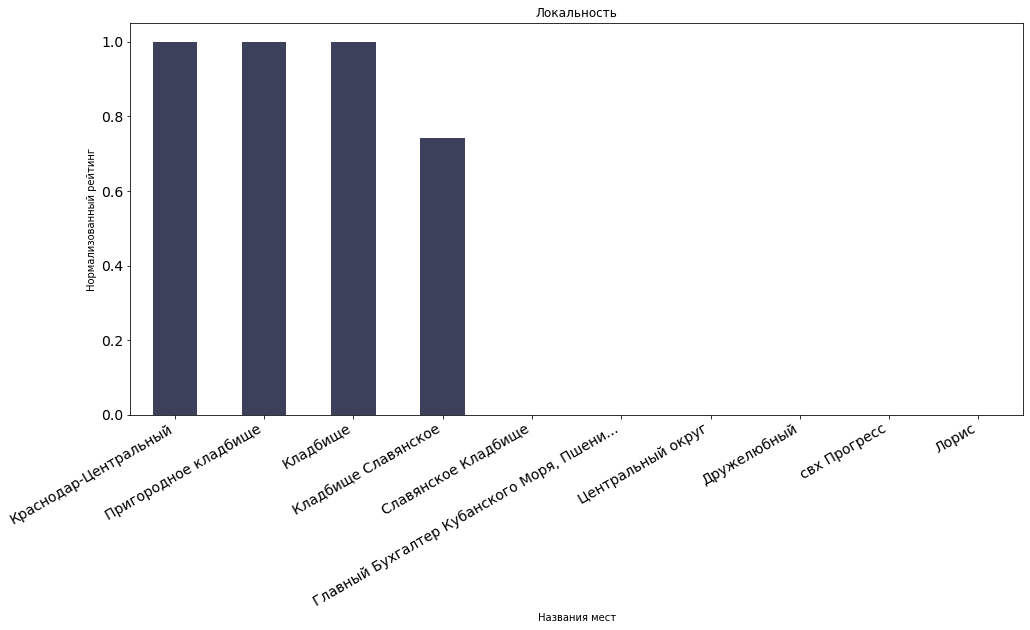

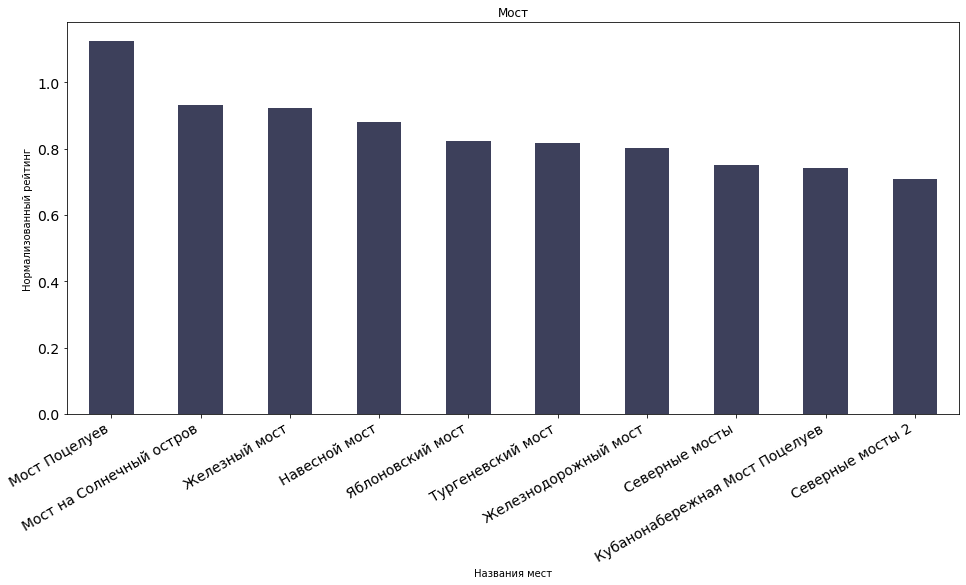

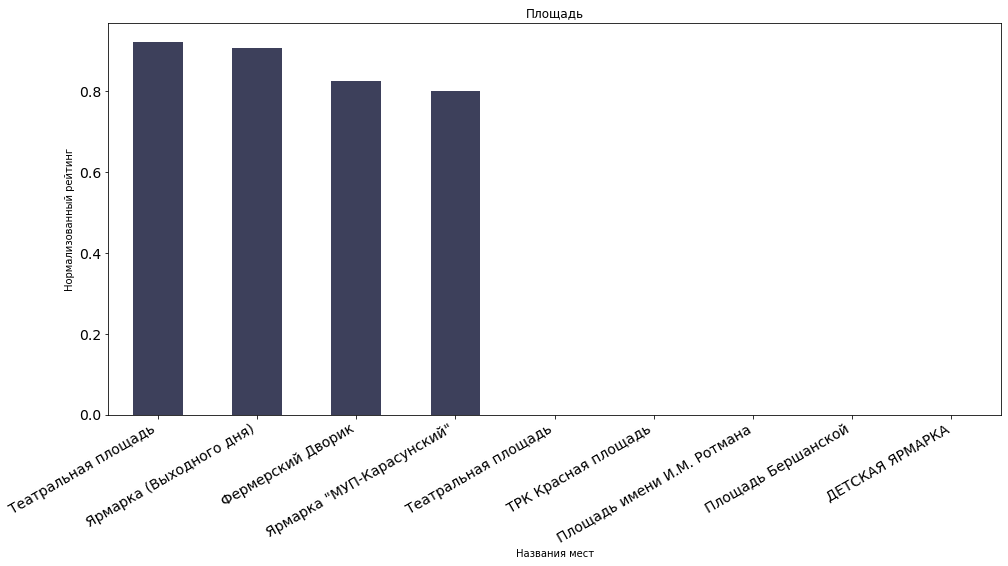

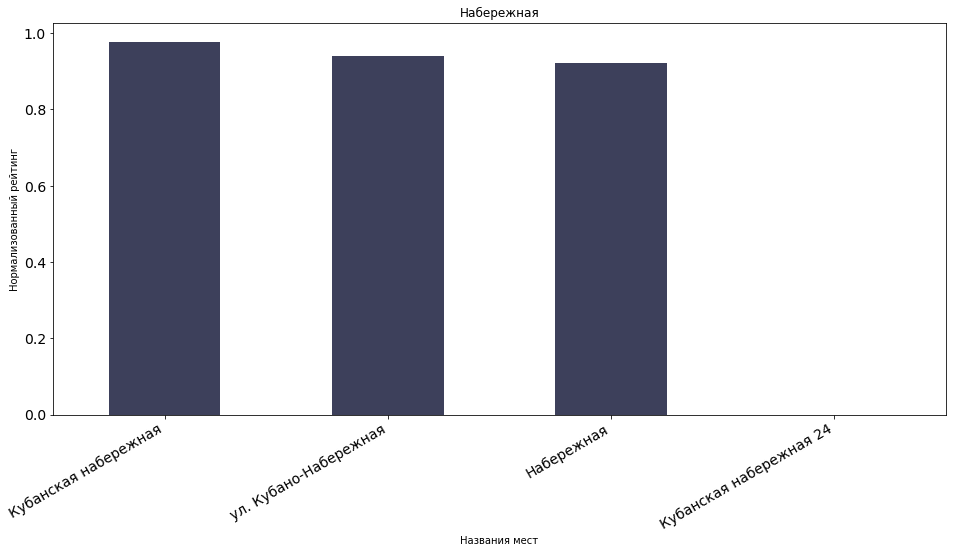

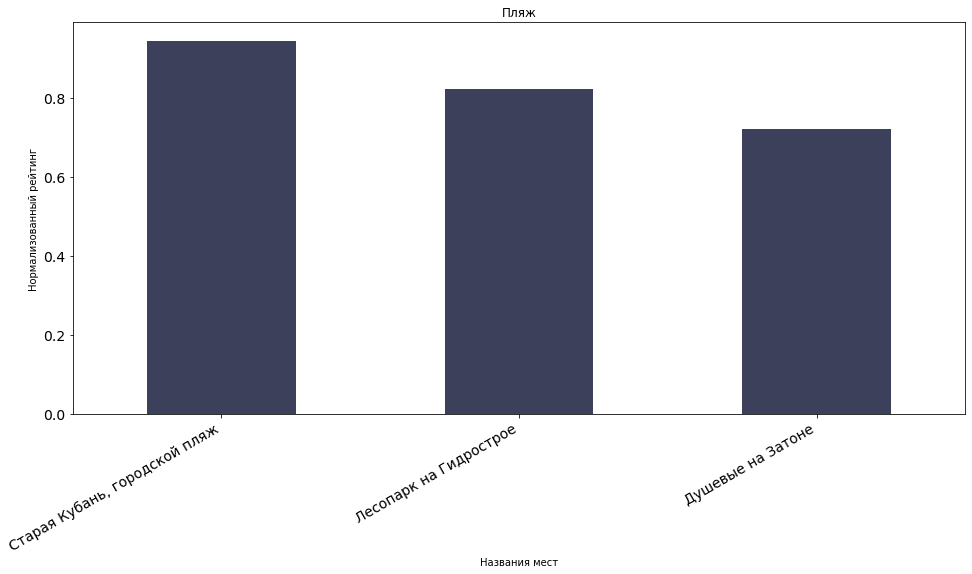

In [31]:
list_top=[]
for i in places_df.category.value_counts().keys():
    plot_df = places_df.loc[places_df.category==i].sort_values('normalized_rating', ascending = False)[:10]
    list_top.append(plot_df)
    plot_df.title = plot_df.title.apply(lambda x: x[:40]+'...' if len(x)>40 else x)
    
    plot_df.set_index('title')['normalized_rating'].plot.bar(color ="#3D405B" , figsize = (16, 8), fontsize=14)
    plt.title(i)
    plt.gcf().autofmt_xdate()
    plt.xlabel('Названия мест')
    plt.ylabel('Нормализованный рейтинг')
    plt.show()